In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv(r"D:\dataset\behavioural_dataset.csv")
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [13]:
df.describe()

,Age,No of Dependents,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,2.270707e+06,1.194040e+06
std,6.246054,1.335265,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.700000e+06,1.500000e+06
max,51.000000,4.000000,5.200000e+06,3.000000e+06


In [14]:
df.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
Total Salary        0
Price               0
dtype: int64

In [15]:
df.rename(columns={'Personal loan' : 'Car Loan'},inplace=True)
df.rename(columns={'Price' : 'EV Price'},inplace=True)
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car Loan,Total Salary,EV Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


#### EDA

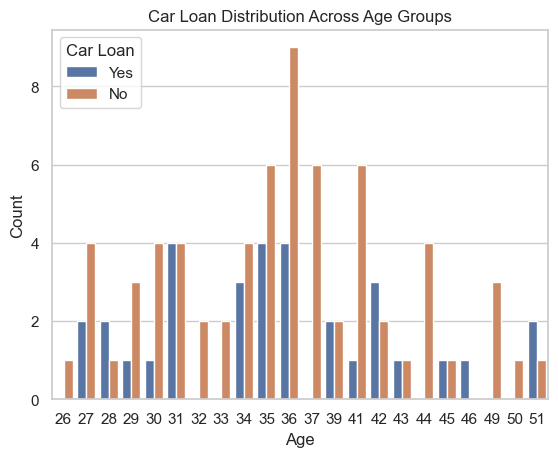

In [93]:
sns.countplot(x='Age', hue='Car Loan', data=df)
plt.title('Car Loan Distribution Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

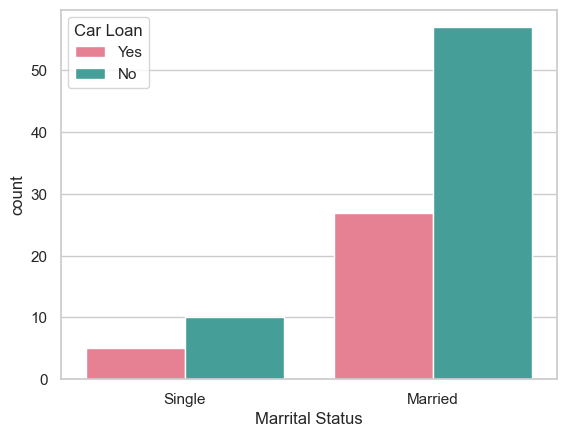

In [94]:
sns.countplot(x='Marrital Status',hue='Car Loan',data=df,palette='husl')
plt.show()

<AxesSubplot:>

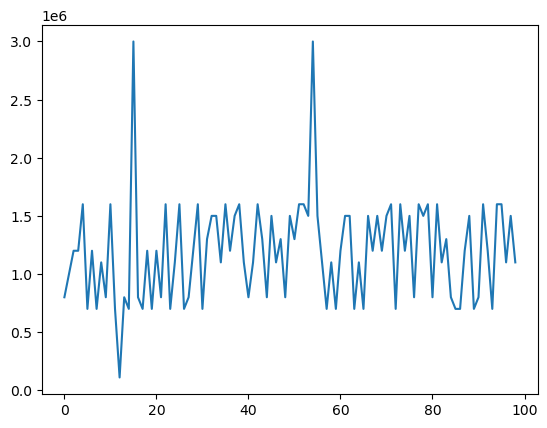

In [18]:
df['EV Price'].plot(kind='line')

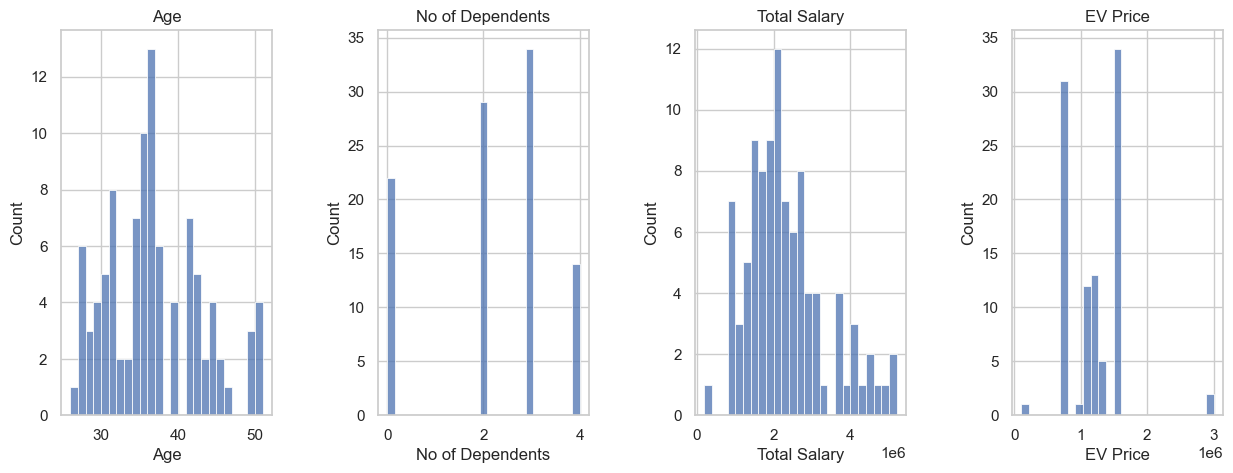

In [96]:
plt.figure(1, figsize=(15,5))
n=0

for x in ['Age', 'No of Dependents' ,'Total Salary'  ,'EV Price']:
    n += 1
    plt.subplot(1,4,n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(df[x], bins= 25)
    plt.title(f'{x}')
plt.show()

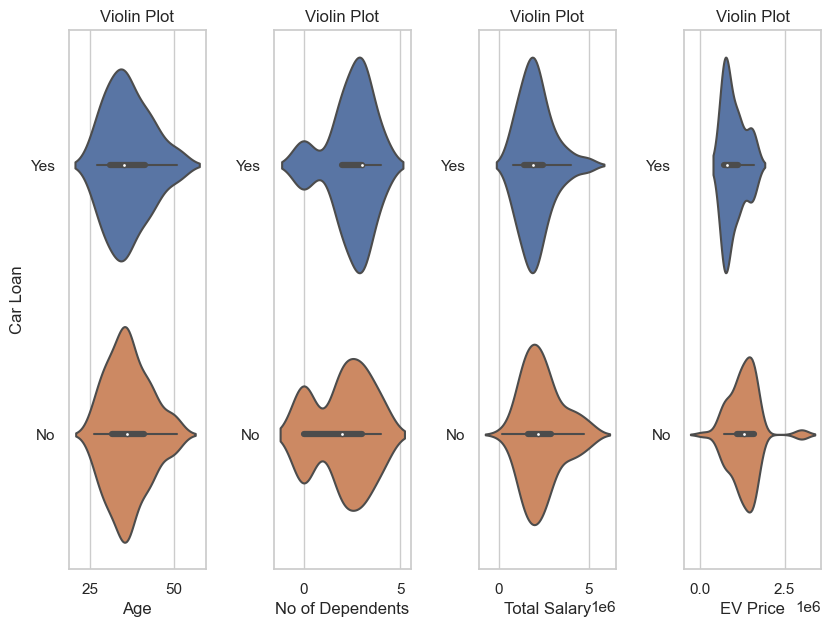

In [99]:
plt.figure(1,figsize=(15,7))
n = 0
for cols in ['Age','No of Dependents','Total Salary','EV Price']:
    n += 1
    plt.subplot(1,6,n)
    sns.set(style = 'whitegrid')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x= cols, y = 'Car Loan', data=df)
    plt.ylabel("Car Loan" if n==1 else '')
    plt.title('Violin Plot')

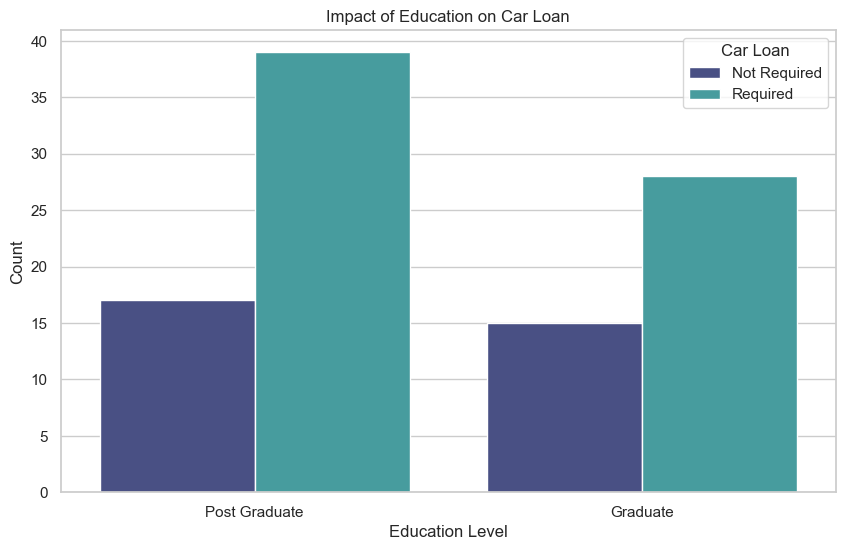

In [101]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Car Loan', data=df, palette='mako')

# Set plot labels and title
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Impact of Education on Car Loan')
plt.legend(title='Car Loan', labels=['Not Required', 'Required'])

# Display the plot
plt.show()

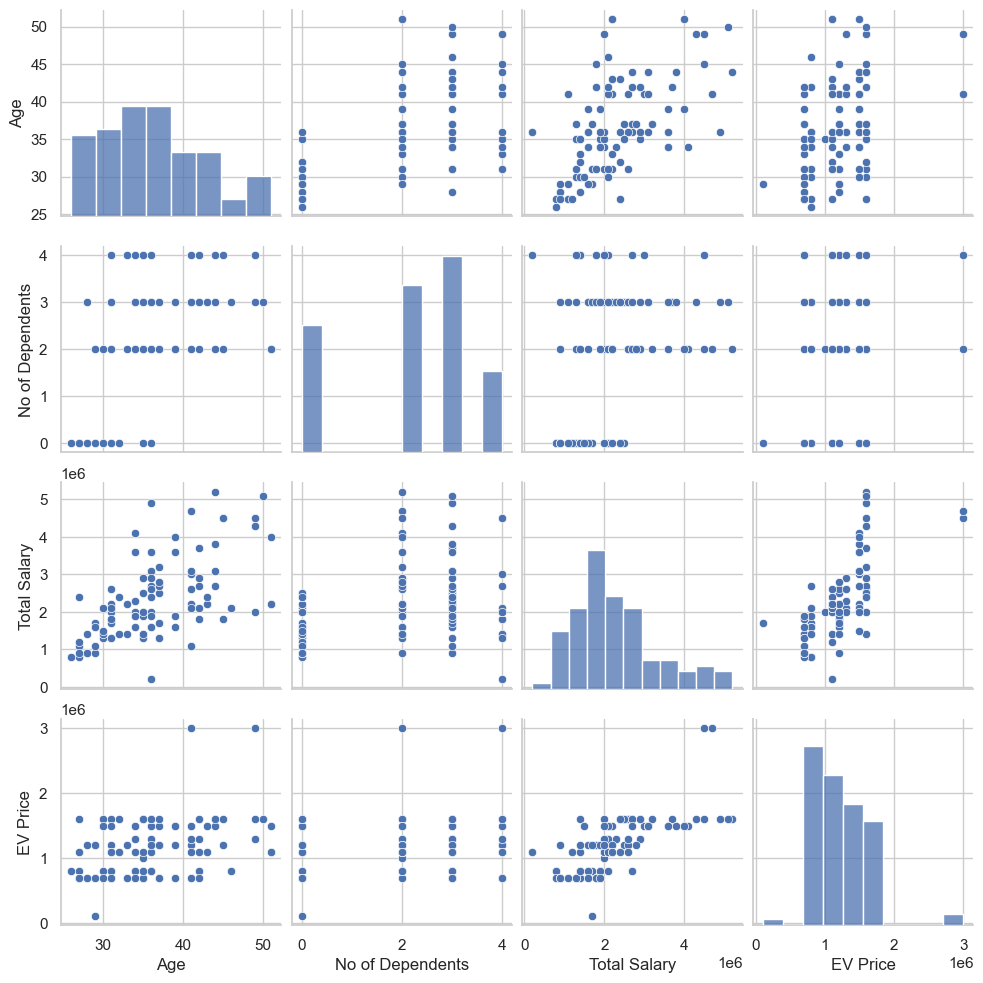

In [102]:
sns.pairplot(df)

In [103]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car Loan,Total Salary,EV Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [104]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# # Convert categorical variables to numerical using one-hot encoding
# df = pd.get_dummies(df, columns=['Profession', 'Marrital Status', 'Education', 'Car Loan'])

# # Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'No of Dependents', 'Total Salary', 'EV Price']])

# Create a new dataframe with the scaled features
df_scaled = pd.DataFrame(scaled_features, columns=['Age', 'No of Dependents', 'Total Salary', 'EV Price'])

# Combine the scaled features with the one-hot encoded categorical features
df_final = pd.concat([df_scaled, df.drop(['Age', 'No of Dependents', 'Total Salary', 'EV Price'], axis=1)], axis=1)

In [105]:
df_final

,Age,No of Dependents,Total Salary,EV Price,Profession,Marrital Status,Education,Car Loan
0,-1.498630,-1.642313,-1.406760,-0.904843,Salaried,Single,Post Graduate,Yes
1,-0.211304,-0.136859,-0.258937,-0.445579,Salaried,Married,Post Graduate,Yes
2,1.397855,1.368594,-0.450240,0.013685,Business,Married,Graduate,Yes
3,0.754191,0.615867,-0.067633,0.013685,Business,Married,Post Graduate,No
4,-0.854967,-0.136859,0.314975,0.932213,Salaried,Married,Post Graduate,Yes
...,...,...,...,...,...,...,...,...
94,-1.498630,-1.642313,0.123671,0.932213,Business,Single,Graduate,No
95,2.202434,0.615867,2.706274,0.932213,Salaried,Married,Post Graduate,No
96,2.363350,-0.136859,-0.067633,-0.215947,Business,Married,Graduate,Yes
97,2.363350,-0.136859,1.654102,0.702581,Salaried,Married,Post Graduate,No


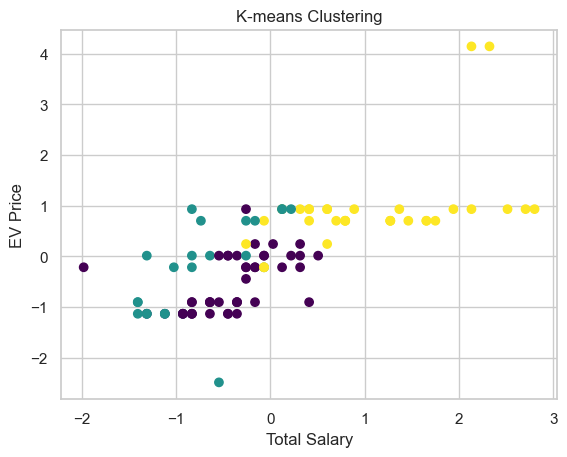

In [106]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_final['Cluster'] = kmeans.fit_predict(df_final[['Age', 'No of Dependents', 'Total Salary', 'EV Price']])
df['Cluster'] = kmeans.fit_predict(df_final[['Age', 'No of Dependents', 'Total Salary', 'EV Price']])

# Visualize the clusters (for 2D visualization)
plt.scatter(df_final['Total Salary'], df_final['EV Price'], c=df_final['Cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Total Salary')
plt.ylabel('EV Price')
plt.show();

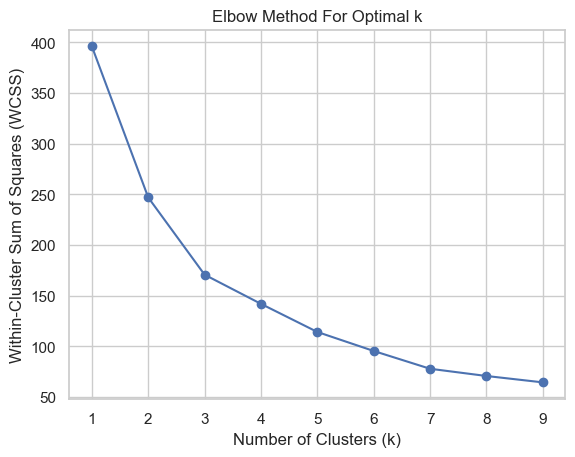

In [107]:
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_final[['Age', 'No of Dependents', 'Total Salary', 'EV Price']])
    wcss.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()